In [11]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
table = pd.read_csv("Untitled 1.csv", usecols=[3,14,22,23,24])

In [13]:
def _get_datetime(timestamp):
    _date, _time = timestamp.split(' ')
    _year, _month, _day = map(int, _date.split('-'))
    _hours, _mins, _seconds = map(int,(_time[:-8], _time[-7:-5], _time[-4:-2]))
    
    if int(_hours) == 12 and timestamp.endswith('am'):
        _hours = 0
    if int(_hours) == 12 and timestamp.endswith('pm'):
        _hours = 12
    else:
        _hours = _hours + (12 if timestamp.endswith('pm') else 0)
        
    _mins = int(_mins)
    _seconds = int(_seconds)
    return datetime.datetime(_year,_month,_day,_hours,_mins,_seconds)

In [16]:
def _num_of_trips():
    global table
        
    max_x = 10
    max_y = 10
    deltas = []
    TimeCap = []
    ST = 0
    LT = 0
    Timestamp1 = None
    Timestamp2 = None
    
    for row,DT  in table.iterrows():
        Datetimes = _get_datetime(DT['Time Captured'])
        Timecap = DT['Time Captured']
        TimeCap.append(Timecap)
        EventCode = DT['Event Code']
        
        if EventCode == 2:
            Timestamp1 = Datetimes
        if EventCode == 5:
            Timestamp2 = Datetimes
            
        if Timestamp1 and Timestamp2:
            delta = Timestamp1 - Timestamp2
            deltas.append(delta.seconds)
    
    for d,t in zip(deltas,TimeCap):
        if d > max_y:
            max_y = d
        max_x += 1
        
        plt.rcParams["figure.figsize"] = (20,20)
        plt.scatter(str(t), d)
        plt.xticks(rotation=90)

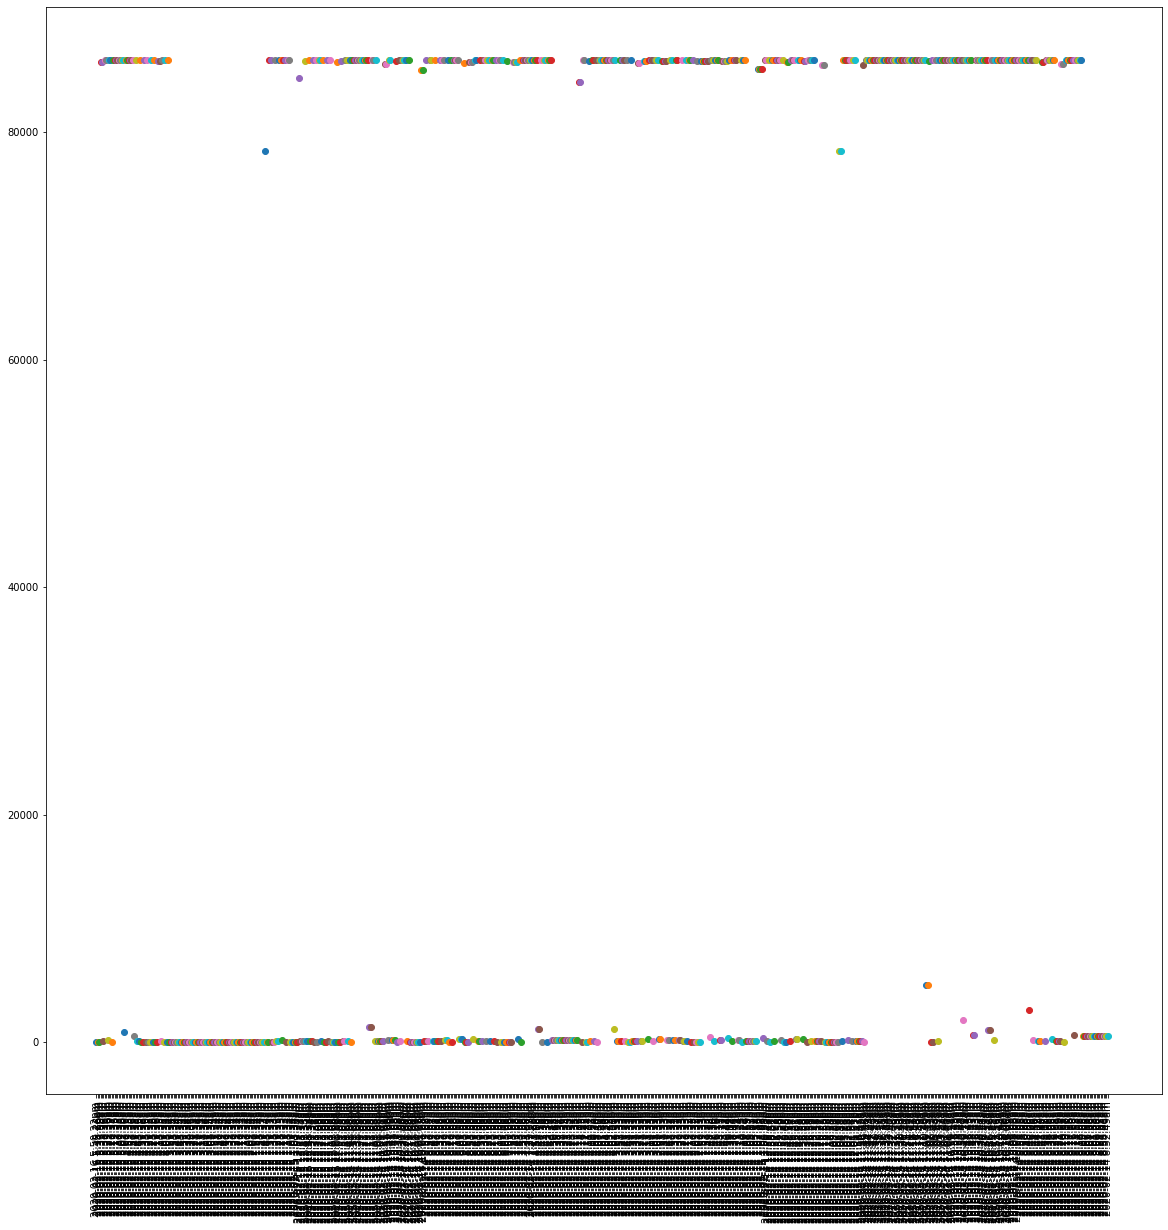

In [17]:
_num_of_trips()